# Quantum metrology notebook

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
import plotting_settings
import scipy.linalg

## State tomography

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.40909091+0.j         0.27272727-0.40909091j]
 [0.27272727+0.40909091j 0.59090909+0.j        ]]


<Figure size 504x504 with 0 Axes>

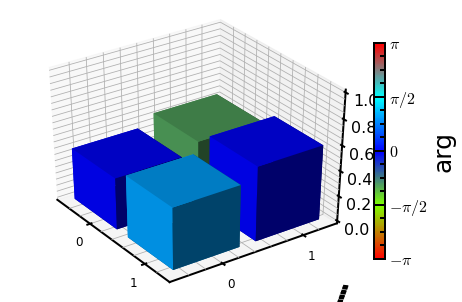

In [9]:
#State tomography
plt.figure(figsize=[7,7])
psi0 = basis(2,0)
psi1 = basis(2,1)
a=3
b=3j+2
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
rho = ket2dm(psi)
matrix_histogram_complex(rho)
print (rho)

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fcc0af646a0>)

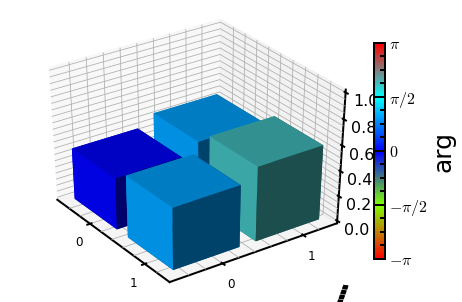

In [10]:
#Can also define matrices
psi0 = np.matrix([1,0]).transpose()
psi1 = np.matrix([0,1]).transpose()
a=3
b=3j+2
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
# psi = Qobj(psi)
# rho = ket2dm(psi)
#or
rho = psi*psi.transpose()
rho = Qobj(rho)
matrix_histogram_complex(rho)

## Quantum fidelity

See http://qutip.org/docs/4.0.2/modules/qutip/metrics.html

Definition: 

a. State fidelity
$$ \mathcal{F}(\rho,\sigma)=\left(\mathrm{Tr}\sqrt{\rho^{1/2}\sigma\rho^{1/2}} \right)^2$$
from which the fidelity between a pure state $|\psi \rangle$ and an arbitrary state $\rho$ can be written as
$$\mathcal{F}(\rho,\psi)=\sqrt{\langle\psi |\rho |\psi\rangle}$$

b. Process fidelity

If the $\chi$ matrix is known, then the fidelity to the ideal state $\chi'$ is 
$$ \mathcal{F}(\chi,\chi')=\left(\mathrm{Tr}\sqrt{\chi^{1/2}\chi '\chi^{1/2}} \right)^2$$

From Pedersen et al., the fidelity between two unitary operations $U$ and $U_o$ is
$$\mathcal{F}=\frac{1}{N(N+1)}\left[\mathrm{Tr}(MM^\dagger) + |\mathrm{Tr}(M)|^2 \right],$$
with $M=U_0^\dagger U$ and $N=2^n$ is the dimension of the Hilbert space

In [11]:
#Using qutip's built in fidelity functions
from qutip import fidelity
psi0 = basis(2,0)
psi1 = basis(2,1)
a=1
b=1
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
print("state fidelity between 0 and 1: ", fidelity(psi0,psi1))
print("state fidelity between 1 and 1:", fidelity(psi1,psi1))
print("state fidelity between 1 and superposition:", fidelity(psi1,psi))

from qutip.qip.operations import cnot
from qutip.qip.operations import csign
from qutip import process_fidelity
cz = csign()
iden = identity(4)
print("process fidelity between cz and cnot: ", process_fidelity(cz,cnot()))
print("process fidelity between cz and cz: ", process_fidelity(cz,cz))
# print("process fidelity between cz and I: ", process_fidelity(cz,iden))

#Or define it ourselves
rho0 = np.array([[1,0],[0,0]])
rho1 = np.array([[0,0],[0,1]])
rho = np.array([[1,1],[1,1]])/np.sqrt(2)


def state_fidelity_func(rho,rho_ideal):
    f = abs(np.trace(scipy.linalg.sqrtm(scipy.linalg.sqrtm(rho_ideal).dot(rho).dot(scipy.linalg.sqrtm(rho_ideal)))))
    return f**2

def process_fidelity_func(U,U_ideal,qubit_num):
    N = 2**qubit_num
    coeff = (N*(N+1))**-1.0
    M = np.conj(U_ideal.transpose()) * U
    f = np.trace(M*np.conj(M.transpose())) + np.trace(M)**2
    return coeff * f

print ('State fidelity as defined, 0 and 1: ', state_fidelity_func(rho0,rho1))    
print ('State fidelity as defined, 0 and 0: ',state_fidelity_func(rho0,rho0))    
print ('State fidelity as defined, 0 and superposition: ', state_fidelity_func(rho0,rho))    
U_cz = np.diag([1,1,1,-1])
U_cnot = np.diag([1,1,0,0])
U_cnot[2,3] = 1
U_cnot[3,2] = 1
U_iden = np.diag([1,1,1,1])
print("Defined process fidelity between cz and cnot: ", process_fidelity_func(U_cz,U_cnot, 2))
print("Defined process fidelity between cz and cz: ", process_fidelity_func(U_cz,U_cz, 2))


state fidelity between 0 and 1:  0.0
state fidelity between 1 and 1: 1.0
state fidelity between 1 and superposition: 0.7071067811865475
process fidelity between cz and cnot:  0.5
process fidelity between cz and cz:  1.0
State fidelity as defined, 0 and 1:  0.0
State fidelity as defined, 0 and 0:  1.0
State fidelity as defined, 0 and superposition:  0.7071067811865471
Defined process fidelity between cz and cnot:  0.30000000000000004
Defined process fidelity between cz and cz:  1.0
